In [4]:
!pip install pystan

In [16]:
# importing the libraries
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

from fbprophet import Prophet

In [5]:
#raeding the data
data=pd.read_csv("/content/airline_passengers.csv")

In [6]:
data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
data.shape

(145, 2)

In [8]:
data.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


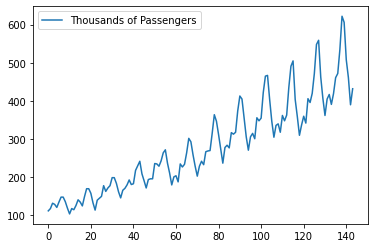

In [10]:
data.plot()

In [11]:
data.drop(144,axis=0,inplace=True)# while checking the tail of dataframe we have seen that unwanted data so we want to remove that.

In [12]:
data.columns = ['ds','y']
data.head()# reason for converting columns is to ds and y is that prophet accept only that way
#https://facebook.github.io/prophet/docs/quick_start.html#python-api

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [13]:
data['ds'] = pd.to_datetime(data['ds']) # converting date into python date format

In [14]:
data.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [17]:
dir(Prophet)# printing the list attributes present in facebook prophet

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [18]:
model=Prophet()#intailizing the model
#https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [19]:
model.fit(data)# fitting on the data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future_dates=model.make_future_dataframe(periods=365)# making future prediction using prophet inbuilt function
# Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
#You can get a suitable dataframe that extends into the future a specified number of days using the helper method 'Prophet.make_future_dataframe'

In [22]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [24]:
prediction=model.predict(future_dates) # making prediction 

In [25]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,53.383415,111.839060,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,50.611718,106.967432,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,82.134671,139.854076,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,79.189171,135.613906,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,83.095707,140.334141,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


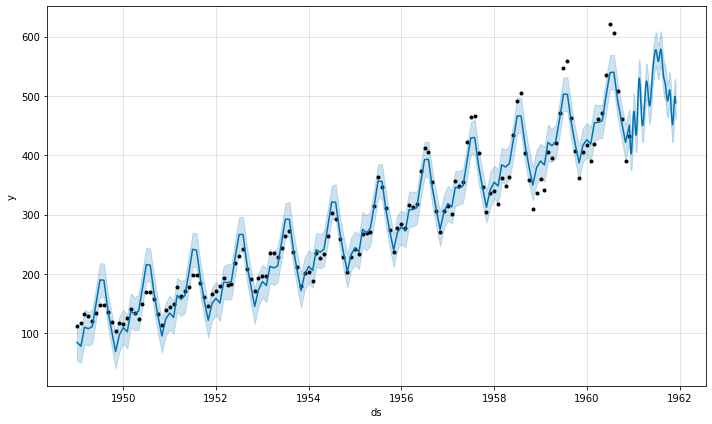

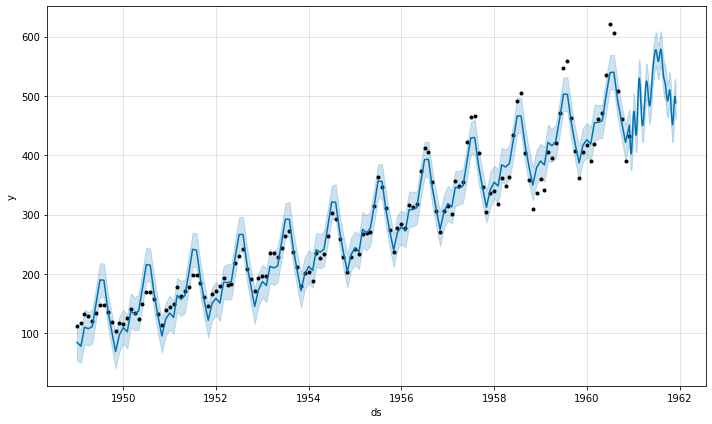

In [27]:
model.plot(prediction) # plotting on the prediction
#here dot points shows the actual data
# blue line shows forcesated data


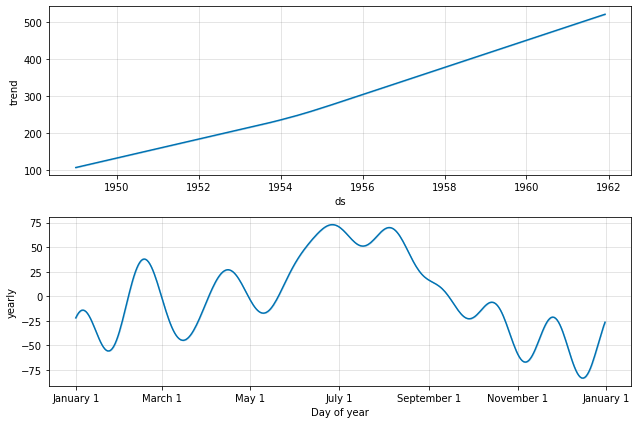

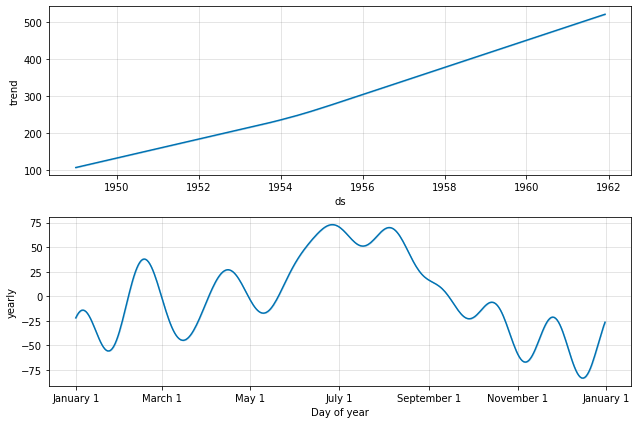

In [28]:
model.plot_components(prediction)

In [29]:
#https://facebook.github.io/prophet/docs/diagnostics.html
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.013969,157.844525,158.219547,150.0,1951-01-18
1,1951-03-01,171.224502,170.602864,171.938829,178.0,1951-01-18
2,1951-04-01,159.628157,158.390041,160.981891,163.0,1951-01-18
3,1951-05-01,145.666500,143.684758,147.792345,172.0,1951-01-18
4,1951-06-01,180.679910,177.719691,183.818884,178.0,1951-01-18


In [30]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818


In [31]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818


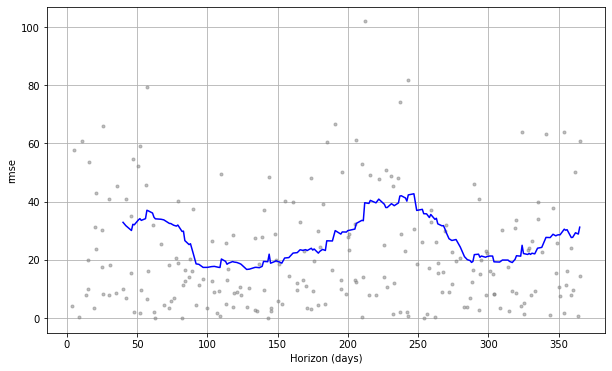

In [32]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
# plotting rmse after cross validation